# Week1_Library 과제

### Q1. Library 와 Framework 의 차이 간단하게 서술하시오. (100자 내외)

#### <b>[Library]</b>
**특정 기능을 모아둔 코드, 함수들의 집합이며 코드 작성 시 활용 가능한 도구들을 의미**

ex) Tensorflow, Pandas, Sklearn, React.js

================================================================================================

#### <b>[Framework]</b>
**원하는 기능 구현에 집중하여 개발할 수 있도록 일정한 형태와 필요한 기능을 갖추고 있는 골격, 뼈대를 의미**
- 사용자는 프레임워크가 정해준 방식대로 클래스, 메서드들을 구현한다.

ex) Django, Flask, Spring, Vue.js

================================================================================================

#### <b>[Library vs. Framework]</b>

**"제어 흐름"** 의 권한이 어디에 있는가에 따라 구분된다. 프레임워크의 경우 사용자는 프레임워크가 지정한 틀 내에서 코드를 작성해야하지만, <br>라이브러리의 경우 사용자가 필요한 상황에 라이브러리를 호출하여 직접 제어를 해야한다.

> 프레임워크가 라이브러리를 포함한다.

**[출처]**
- [1] 19기 정규세션 Week 1-(2): Frameworks(and Libraries)
- [2] https://cocoon1787.tistory.com/745

### Q2. 딥러닝과 머신러닝의 관계 및 특징, 차이 간단하게 서술하시오. (200자 내외)

<img src = 'https://blog.kakaocdn.net/dn/cJP4Tv/btqzOXvfmuB/YEGlYBPYLY3A8GKtY59erK/img.png' style = 'width: 800px;'>

> 그림 출처: https://blog.kakaocdn.net/dn/cJP4Tv/btqzOXvfmuB/YEGlYBPYLY3A8GKtY59erK/img.png

#### <b>[머신러닝]</b>

기계가 명시적으로 코딩되지 않은 동작을 스스로 학습해 수행하게 하는 연구 분야

=> 어떤 문제와 답을 기계에게 학습시킨 후 원리를 깨우치게 하여 새로운 문제가 주어져도 스스로 답을 낼 수 있게 하는 것

#### <b>[딥러닝]</b>

컴퓨터가 인간의 뇌를 모방할 수 있도록 하는 기계 학습 방법

#### <b>[머신러닝 vs. 딥러닝]</b>
머신러닝의 경우 알고리즘에 입력 하기 전 필요한 특징들을 사람이 직접 선정하여 학습시켜야 하지만, 딥러닝의 경우 특징을 선정하는 것까지 한꺼번에 학습한다. 예를 들면, 머신러닝의 경우 종속변수를 추정하는데에 유용한 특징들을 직접 선정해야 하지만 딥러닝의 경우 특징을 선정하는 것까지 학습한다.

### Q3. 아래의 코드에 주석 달기.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transfroms

device = 'cuda' if torch.cuda.is_available() else 'cpu' # gpu 사용가능한지 여부 확인
torch.manual_seed(45) # pytorch에서 random_seed를 고정하기 위한 함수이다.
if device == 'cuda':
    torch.cuda.manual_seed_all(45)
print(device + " is available")

cpu is available


In [2]:
learning_rate = 0.001 # 학습률
batch_size = 100 # 배치 사이즈
num_classes = 10 # 클래스 수
epochs = 5 # 에포크

In [4]:

train_set = torchvision.datasets.MNIST( # MNIST 데이터셋 불러오기
    root = './data/MNIST',
    train = True, # 훈련 데이터
    download = True,
    transform = transfroms.Compose([
        transfroms.ToTensor() # Numpy Array를 tensor(torch)로 변환시킨다.
    ])
)

test_set = torchvision.datasets.MNIST(
    root = './data/MNIST',
    train = False, # 테스트 데이터
    download = True,
    transform = transfroms.Compose([
        transfroms.ToTensor() # Numpy Array를 tensor(torch)로 변환시킨다.
    ])
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST\MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\MNIST\raw



In [5]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size) # 배치사이즈 100으로 설정하여 train data를 불러온다.
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size) # 배치사이즈 100으로 설정하여 test data를 불러온다.

examples = enumerate(train_set) # 번호 붙이기
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([1, 28, 28])

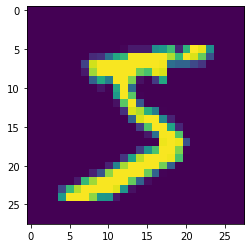

In [15]:
import matplotlib.pyplot as plt
plt.imshow(train_set[0][0][0])

### Conv2d 기본 세팅
    in_channels(입력 데이터 채널 수), out_channels(출력할 데이터의 채널 수), kernel_size(커널 사이즈) 값만 필수로 입력하면 된다.

```python
torch.nn.Conv2d(
    in_channels, 
    out_channels, 
    kernel_size, 
    stride=1, 
    padding=0, 
    dilation=1, 
    groups=1, 
    bias=True, 
    padding_mode='zeros'
)
```



![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcj56rk%2FbtqHjqbQhq3%2FyTlqhHrblOESyQG6FubhIK%2Fimg.png)

그림 출처 및 참고: https://yong0810.tistory.com/17

In [31]:
# 가장 기본적인 CNN 모델 구조이다.
class ConvNet(nn.Module):
  def __init__(self): 
        super(ConvNet, self).__init__() 
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5) # 2차원 합성곱 연산 (input 채널 수: 1, output 채널 수: 10, 커널 사이즈: 5)
        # => 5*5 커널을 사용하여 합성곱 연산을 진행한다. 나머지는 default값으로, stride(간격): 1, padding: 0이다.
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5) # 2차원 합성곱 연산 (input 채널 수: 10, output 채널 수: 20, 커널 사이즈: 5)
        self.drop2D = nn.Dropout2d(p=0.25, inplace=False) # 신경망의 뉴런을 부분적으로 생략하여 모델의 과적합을 방지하는 방법으로 
        # 0.25의 확률로 뉴런을 쉬게한다.

        self.mp = nn.MaxPool2d(2) # MaxPooling Layer: CNN에서 Pooling이란 특징을 뽑아내는 과정이다. 그 중, filter 2를 사용하여 feature map을
        # 최댓값으로 pooling하는 layer이다.
        self.fc1 = nn.Linear(320,100) # FullyConnected Layer로, 퍼셉트론을 의미한다. input 벡터의 차원은 320, output 벡터의 차원은 100이다.
        self.fc2 = nn.Linear(100,10)  # FullyConnected Layer로, 퍼셉트론을 의미한다. input 벡터의 차원은 100, output 벡터의 차원은 10이다.


  def forward(self, x): # 순방향 전파 과정이다. 위 그림을 보면 이해가 쉽다.
        x = F.relu(self.mp(self.conv1(x))) 
        # Keras 기준 => Conv2D(10, 5, (28, 28, 1)), MaxPooling2D(),  tf.keras.activations.relu(~)
        x = F.relu(self.mp(self.conv2(x))) 
        # Keras 기준 => Conv2D(20, 5, (12, 12, 10)), MaxPooling2D(),  tf.keras.activations.relu(~)
        x = self.drop2D(x) 
        # Keras 기준 => Dropout(0.25)
        x = x.view(x.size(0), -1) # FC층에 입력하기 위해 tensor를 펴는(?) 작업이다.
        # Keras 기준 => Flatten()
        
        x = self.fc1(x) # 퍼셉트론이다. input 벡터의 차원은 320, output 벡터의 차원은 100이다.
        # Keras 기준 => Dense(100)
        x = self.fc2(x)
        # Keras 기준 => Dense(10, activation = 'softmax')
        return F.log_softmax(x) # 10개의 클래스를 분류하기 위해 마지막 활성화함수로 softmax를 사용하였다.

In [32]:

model = ConvNet().to(device) # 모델을 적재한다.
criterion = nn.CrossEntropyLoss().to(device) # 10개의 클래스를 분류해야 하므로 손실함수는 CrossEntropyLoss를 사용한다.
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate) # Adam optimizer 방식으로 가중치를 갱신하며, 
# 위에서 정의한 학습률 0.001에 따라 최적화를 진행한다.

[optimizer.zero_grad()쓰는 이유](https://yeko90.tistory.com/entry/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98-%EA%B8%B0%EC%B4%88-modelzerograd-optimizerzerograd-%EC%93%B0%EB%8A%94-%EC%9D%B4%EC%9C%A0)

In [33]:

for epoch in range(epochs): # 5 epochs 동안 반복한다.
    avg_cost = 0
    for data, target in train_loader: # 데이터를 불러온다.
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad() # 파이토치에서는 미분한 값들이 누적되는 경향이 있기 때문에 그래디언트를 0으로 초기화시킨다.
        hypothesis = model(data) # 모델을 순방향 패스하여 결과값을 저장한다.
        cost = criterion(hypothesis, target) # 순방향 패스한 결과값과 target값과의 loss를 계산한다.
        cost.backward() # 역전파 알고리즘을 통해 파라미터를 갱신한다.
        optimizer.step() # 모델의 학습 파라미터를 갱신한다.
        avg_cost += cost / len(train_loader) # 평균 loss값을 계산한다.
    print('[Epoch: {:>4}]  cost = {:>.9}'.format(epoch + 1, avg_cost)) # 각 epoch마다 평균 loss값을 출력한다.

C:\Users\ms964\AppData\Local\Temp\ipykernel_21472\4108131694.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


[Epoch:    1]  cost = 0.329687893
[Epoch:    2]  cost = 0.111255169
[Epoch:    3]  cost = 0.0846419185
[Epoch:    4]  cost = 0.0726653263
[Epoch:    5]  cost = 0.0652723163


In [34]:

model.eval() # 모델을 test한다.
with torch.no_grad(): # grad를 해제한다.
    correct = 0
    total = 0

    for data, target in test_loader: # 테스트 데이터 불러오기
        data = data.to(device)
        target = target.to(device)
        out = model(data) # 테스트 데이터를 모델에 탑재하여 결과값을 얻는다.
        preds = torch.max(out.data, 1)[1] # 출력이 분류 각각에 대한 값으로 나타나기 때문에, 가장 높은 값을 갖는 인덱스를 추출한다.
        total += len(target) # 전체 클래스 개수
        correct += (preds==target).sum().item() # 예측값과 출력값이 같은지 비교한다.
        
    print('Test Accuracy: ', 100.*correct/total, '%') # 테스트 결과를 출력한다.
     

C:\Users\ms964\AppData\Local\Temp\ipykernel_21472\4108131694.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Test Accuracy:  98.74 %


## 첫 정규세션 들으시느라 고생 많으셨습니다.